<a href="https://colab.research.google.com/github/kartikgt/python_ml_ai/blob/master/Wordcloud%20of%20most%20used%20tools%20from%20ICLR%202020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

As seen in https://www.analyticsvidhya.com/blog/2020/05/key-takeaways-iclr-2020/

In [1]:
!pip install openreview-py
!pip install pipreqs

     |████████████████████████████████| 133kB 3.5MB/s 
     |████████████████████████████████| 28.9MB 146kB/s 
     |████████████████████████████████| 13.7MB 37.6MB/s 
     |████████████████████████████████| 153kB 40.4MB/s 
     |████████████████████████████████| 256kB 40.4MB/s 
     |████████████████████████████████| 1.3MB 38.6MB/s 
  Created wheel for pylatexenc: filename=pylatexenc-2.3-cp36-none-any.whl size=126293 sha256=07058ae402a8d8d08f7af85bea62ba82d18f2eeef4cf619dfcd9572923e91b80
  Stored in directory: /root/.cache/pip/wheels/52/c2/19/31fde438425ad74591e74b92c2d15865a9de38cd48f7ffa572
Successfully built pylatexenc
  Found existing installation: protobuf 3.10.0
    Uninstalling protobuf-3.10.0:
      Successfully uninstalled protobuf-3.10.0


In [0]:
import os
import re
import sys
import requests
import openreview
import pandas as pd
import matplotlib.pyplot as plt

from random import choice
from wordcloud import WordCloud
from urllib.parse import urlparse 


In [2]:
!wget https://cdn.analyticsvidhya.com/wp-content/uploads/2020/05/all_tools.csv

--2020-05-09 16:55:12--  https://cdn.analyticsvidhya.com/wp-content/uploads/2020/05/all_tools.csv
Resolving cdn.analyticsvidhya.com (cdn.analyticsvidhya.com)... 104.26.14.185, 104.26.15.185, 2606:4700:20::681a:fb9, ...
Connecting to cdn.analyticsvidhya.com (cdn.analyticsvidhya.com)|104.26.14.185|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64491 (63K) [text/csv]
Saving to: ‘all_tools.csv’

all_tools.csv       100%[===================>]  62.98K  --.-KB/s    in 0.02s   

2020-05-09 16:55:14 (3.88 MB/s) - ‘all_tools.csv’ saved [64491/64491]



In [3]:
!ls

all_tools.csv  sample_data


In [4]:
all_tools = pd.read_csv('all_tools.csv')
all_tools.head()

,all_repo_names,all_tool_names
0,KP2D,\n
1,CN-DPM,"ipdb\n,jupyterlab\n,matplotlib\n,numpy\n,pyyam..."
2,GLAD,"matplotlib==3.2.1\n,networkx==2.4\n,pandas==1...."
3,bert_score,"# pytorch\n,torch>=1.0.0\n,# progress bars in ..."
4,delay_stability,"scipy==1.4.1\n,matplotlib==3.2.1\n,torchvision..."


In [5]:
all_tools.shape

(237, 2)

In [0]:
def cleaner(tool_list):
  cleaned_list=""
  try:
    cleaned_list=[]
    for tool in tool_list:
      cleaned_tool = re.findall("^\w+",tool)
      if not cleaned_tool:
        pass
      else:
        cleaned_list.append(cleaned_tool[0])
    cleaned_list = ",".join(cleaned_list)
    return cleaned_list
  except:
    tool_list = ",".join(tool_list)
    "unclean_list".join(tool_list)
    return tool_list

all_tools["all_tool_names_cleaned"] = all_tools.all_tool_names.str.split(",").apply(cleaner)

    


In [10]:
all_tools.head()

,all_repo_names,all_tool_names,all_tool_names_cleaned
0,KP2D,\n,
1,CN-DPM,"ipdb\n,jupyterlab\n,matplotlib\n,numpy\n,pyyam...","ipdb,jupyterlab,matplotlib,numpy,pyyaml,tensor..."
2,GLAD,"matplotlib==3.2.1\n,networkx==2.4\n,pandas==1....","matplotlib,networkx,pandas,numpy,torch,scipy,s..."
3,bert_score,"# pytorch\n,torch>=1.0.0\n,# progress bars in ...","torch,tqdm,transformers,matplotlib,pandas,numpy"
4,delay_stability,"scipy==1.4.1\n,matplotlib==3.2.1\n,torchvision...","scipy,matplotlib,torchvision,six,torch,bokeh,p..."


In [11]:
all_tools.all_tool_names_cleaned.str.contains("torch").sum()

154

In [0]:
def give_score(tool_name, offset=0):
  num = all_tools.all_tool_names_cleaned.str.contains(tool_name).sum()
  num += offset
  print(
      "Count of {} is {} and total usage is {}%".format(
          tool_name,num,round((num/(all_tools.shape[0]+offset)) * 100,4)
      )
  )

In [16]:
give_score("torch")
give_score("tensorflow", offset=12)
give_score("keras")

Count of torch is 154 and total usage is 64.9789%
Count of tensorflow is 95 and total usage is 38.1526%
Count of keras is 23 and total usage is 9.7046%


In [18]:
#to find how many unique tools are present in the data
all_tools.all_tool_names_cleaned.str.split(",",expand=True).stack().unique().shape

(687,)

In [24]:
#to get top 50 tools and their count
all_tools.all_tool_names_cleaned.str.split(",",expand=True).stack().value_counts()[:50]

numpy            206
torch            156
matplotlib       114
scipy            109
tensorflow        92
tqdm              89
torchvision       86
pillow            70
pandas            65
scikit_learn      48
keras             39
tensorboardx      39
scikit            31
seaborn           30
pyyaml            28
h5py              27
requests          27
six               27
gym               25
tensorboard       25
networkx          25
absl              23
python            23
pytest            22
imageio           20
opencv_python     19
protobuf          19
ipython           18
jupyter           15
nltk              14
joblib            14
mkl               14
certifi           13
pyparsing         13
urllib3           13
                  13
opencv            13
cloudpickle       12
mock              12
termcolor         12
cycler            12
click             12
chardet           11
xorg              11
future            11
kiwisolver        11
idna              11
pytz         

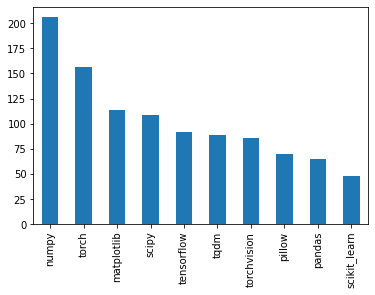

In [25]:
#plot a bar graph for most used tools
all_tools.all_tool_names_cleaned.str.split(",",expand=True).stack().value_counts()[:10].plot(kind='bar')

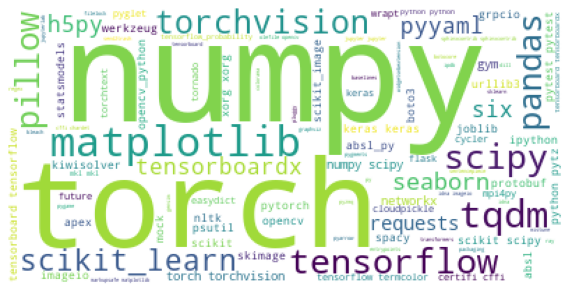

In [28]:
#generate a wordcloud of the same
all_tool_string = ",".join(all_tools.all_tool_names_cleaned)
wordcloud = WordCloud(background_color="white",max_words=100)
wordcloud.generate(all_tool_string)

plt.figure(figsize=(10,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()